PRACTICAL 7 GRAPHING ALGORITHMS

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

7.1 Dijkstra Algorithm for Shortest Path

In [5]:
def do_dijkstra(graph,src,dest):
  short_path = nx.dijkstra_path(G=graph,source=src,target=dest,weight='weight')
  path_edges = list(zip(short_path,short_path[1:]))
  print(f"Shorted Path From {src} -> {dest}: {short_path}")
  print("Path: ", nx.dijkstra_path_length(graph,src,dest,'weight'))
  pos = nx.circular_layout(graph)
  nx.draw_networkx_nodes(short_path, pos, node_color='r')
  nx.draw_networkx_nodes(graph.nodes - short_path, pos,node_color='k')
  nx.draw_networkx_edges(graph, pos, edgelist=graph.edges)
  nx.draw_networkx_edges(graph,pos,edgelist=path_edges,edge_color='r')
  labels = nx.get_edge_attributes(graph,'weight')
  nx.draw_networkx_edge_labels(graph,pos,labels)
  nx.draw_networkx_labels(graph,pos, font_color='w')
  plt.axis("off")
  plt.show()

Shorted Path From a -> z: ['a', 'd', 'e', 'z']
Path:  6


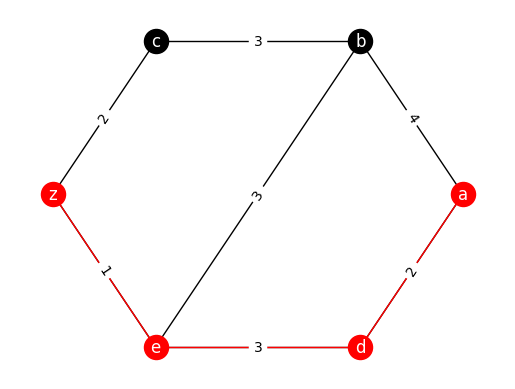

In [8]:
#1
D = nx.Graph()
d_edges = [
('a','b',4),
('b','c',3),
('c','z',2),
('z','e',1),
('e','d',3),
('b','e',3),
('a','d',2),]
D.add_weighted_edges_from(d_edges)
do_dijkstra(D,'a','z')

Shorted Path From a -> z: ['a', 'b', 'e', 'd', 'z']
Path:  7


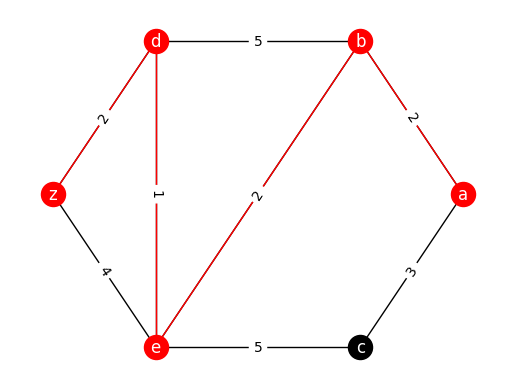

In [10]:
#2
D = nx.Graph()
d_edges = [
('a','b',2),
('b','d',5),
('d','z',2),
('z','e',4),
('e','c',5),
('a','c',3),
('b','e',2),
('d','e',1),
]
D.add_weighted_edges_from(d_edges)
do_dijkstra(D,'a','z')

Shorted Path From a -> z: ['a', 'c', 'd', 'e', 'g', 'z']
Path:  16


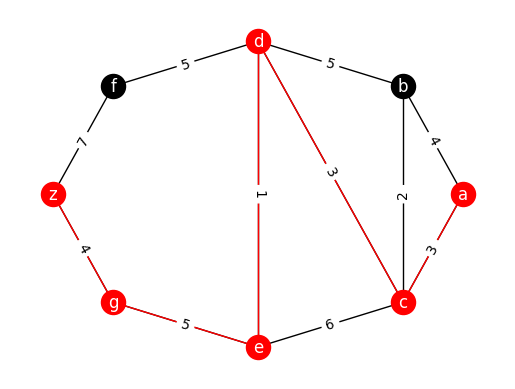

In [11]:
#3
D = nx.Graph()
d_edges = [
('a','b',4),
('b','d',5),
('d','f',5),
('f','z',7),
('g','z',4),
('e','g',5),
('c','e',6),
('c','d',3),
('d','e',1),
('a','c',3),
('b','c',2),
]
D.add_weighted_edges_from(d_edges)
do_dijkstra(D,'a','z')

Shorted Path From 0 -> 6: [0, 1, 3, 4, 6]
Path:  19


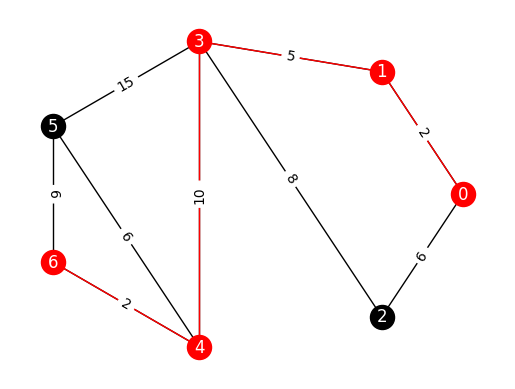

In [12]:
#4
D = nx.Graph()
d_edges = [
(0,1,2),
(1,3,5),
(3,5,15),
(5,6,6),
(6,4,2),
(4,3,10),
(3,2,8),
(2,0,6),
(5,4,6),
]
D.add_weighted_edges_from(d_edges)
do_dijkstra(D,0,6)

Shorted Path From 0 -> 4: [0, 7, 6, 5, 4]
Path:  21


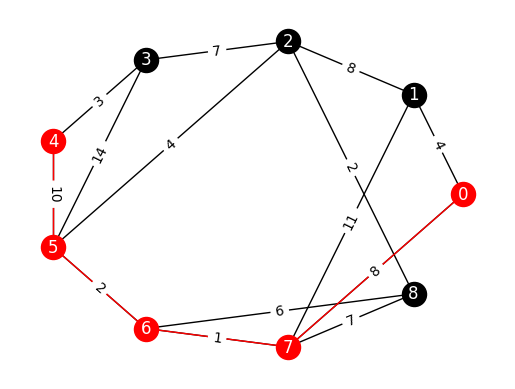

In [13]:
#5
D = nx.Graph()
d_edges = [
(0,1,4),
(1,2,8),
(2,3,7),
(3,4,3),
(4,5,10),
(5,6,2),
(5,2,4),
(5,3,14),
(6,7,1),
(6,8,6),
(7,0,8),
(7,1,11),
(7,8,7),
(8,2,2),
]
D.add_weighted_edges_from(d_edges)
do_dijkstra(D,0,4)

2. With any arbitary graph

Shorted Path From a -> z: ['a', 'c', 'b', 'd', 'z']
Path:  14


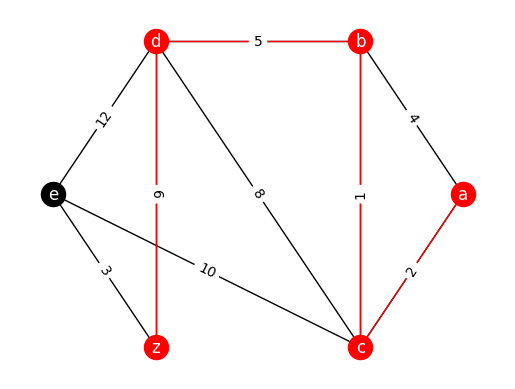

In [14]:
D = nx.Graph()
D.add_nodes_from(['a','b','d','e','z'])
d_edges = [
('a','b',4),
('a','c',2),
('b','d',5),
('b','c',1),
('c','d',8),
('c','e',10),
('d','e',12),
('d','z',6),
('e','z',3),
]
D.add_weighted_edges_from(d_edges)
do_dijkstra(D,'a','z')

7.2 Kruskal and Prim's Algorithm for Minimal Spanning Tree

In [15]:
def do_MST(graph,method):
  if method in ['kruskal','prim']:
    print(f"Method: {method.capitalize()}")
    mst = nx.minimum_spanning_tree(graph,algorithm=method)
    print("MST Edges: ",sorted(mst.edges))
  pos = nx.circular_layout(graph)
  nx.draw_networkx_labels(graph,pos, font_color='w')
  nx.draw_networkx_nodes(mst.nodes, pos, node_color='r')
  nx.draw_networkx_nodes(graph.nodes - mst.nodes, pos,node_color='k')
  glabels = nx.get_edge_attributes(graph,'weight')
  nx.draw_networkx_edges(graph, pos, edgelist=graph.edges,alpha=0.3)
  nx.draw_networkx_edge_labels(graph,pos,glabels,alpha=0.5)
  tlabels = nx.get_edge_attributes(mst,'weight')
  nx.draw_networkx_edges(graph,pos,edgelist=mst.edges,edge_color='r')
  nx.draw_networkx_edge_labels(mst,pos,tlabels)
  plt.title(method.capitalize())
  plt.axis("off")
  plt.show()

1. Any Cycle Graph

Method: Kruskal
MST Edges:  [(0, 1), (0, 4), (1, 2), (2, 3)]


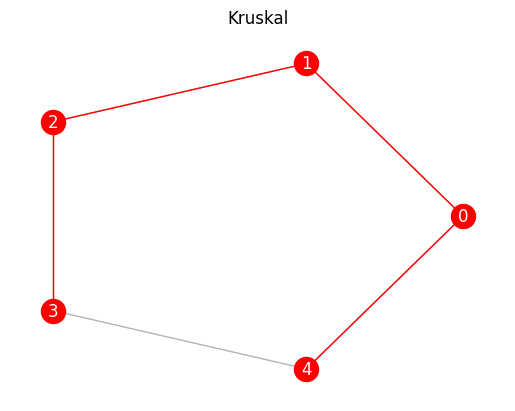

Method: Prim
MST Edges:  [(0, 1), (0, 4), (1, 2), (3, 4)]


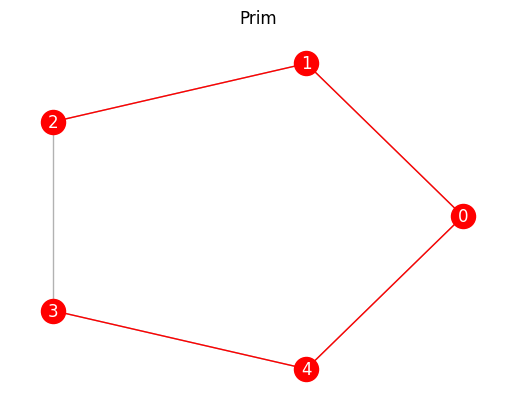

In [16]:
C = nx.cycle_graph(5)
do_MST(C,'kruskal')
do_MST(C,'prim')

2. Any Random Graph

Method: Kruskal
MST Edges:  [(0, 2), (0, 4), (0, 6), (1, 3), (1, 4), (1, 7), (1, 8), (2, 5), (2, 9)]


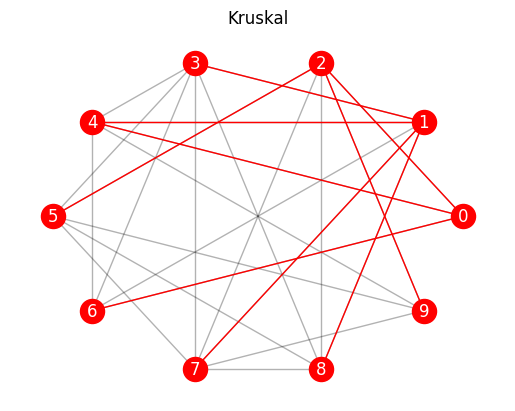

Method: Prim
MST Edges:  [(0, 2), (0, 4), (0, 6), (1, 4), (2, 5), (2, 7), (2, 8), (2, 9), (3, 4)]


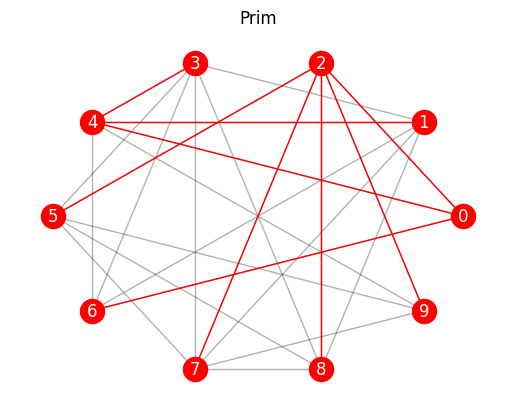

In [17]:
R = nx.erdos_renyi_graph(10,0.6,15)
do_MST(R,'kruskal')
do_MST(R,'prim')

3. Graphs given below

Method: Kruskal
MST Edges:  [(0, 1), (0, 7), (2, 3), (2, 5), (2, 8), (3, 4), (5, 6), (6, 7)]


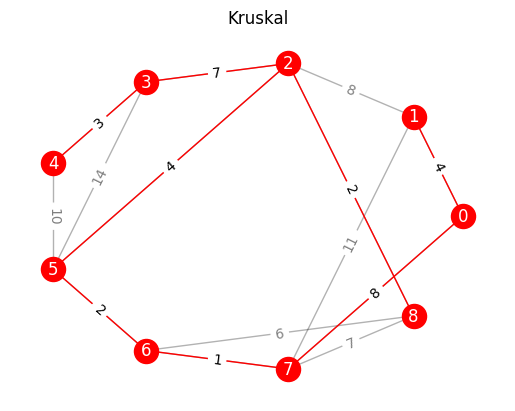

Method: Prim
MST Edges:  [(0, 1), (0, 7), (2, 3), (2, 5), (2, 8), (3, 4), (5, 6), (6, 7)]


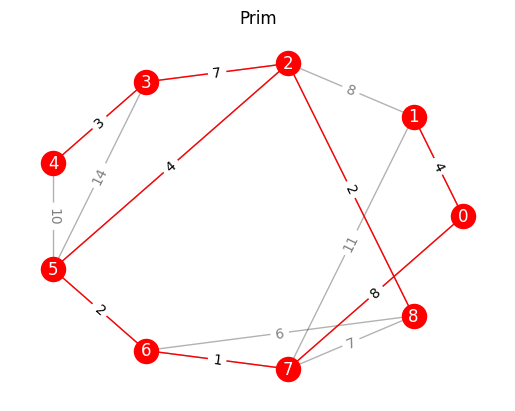

In [18]:
#1
G1 = nx.Graph()
G1.add_weighted_edges_from(
[
(0,1,4),
(1,2,8),
(2,3,7),
(3,4,3),
(4,5,10),
(5,6,2),
(5,2,4),
(5,3,14),
(6,7,1),
(6,8,6),
(7,0,8),
(7,1,11),
(7,8,7),
(8,2,2),
])
do_MST(G1,'kruskal')
do_MST(G1,'prim')

Method: Kruskal
MST Edges:  [('a', 'b'), ('a', 'c'), ('d', 'e'), ('f', 'c'), ('f', 'e'), ('f', 'g')]


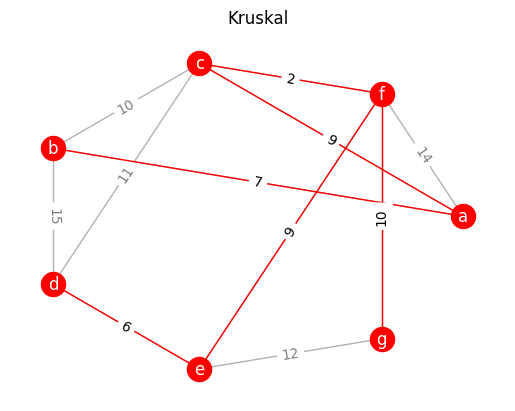

Method: Prim
MST Edges:  [('a', 'b'), ('a', 'c'), ('d', 'e'), ('f', 'c'), ('f', 'e'), ('f', 'g')]


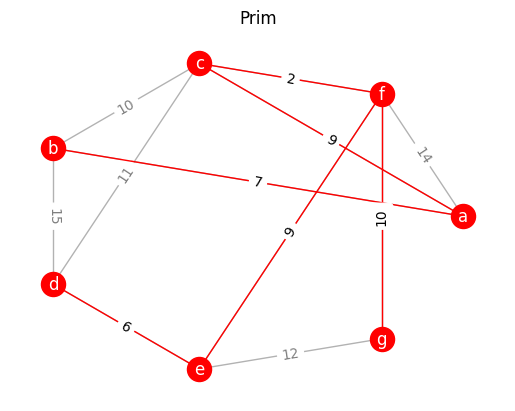

In [19]:
#2
G2 = nx.Graph()
G2.add_weighted_edges_from(
[
('a','f',14),
('a','c',9),
('a','b',7),
('b','d',15),
('b','c',10),
('c','d',11),
('d','e',6),
('c','f',2),
('e','f',9),
('e','g',12),
('f','g',10)])
do_MST(G2,'kruskal')
do_MST(G2,'prim')

7.3 DFS and BFS for Graph Traversal

In [20]:
def traversal(graph, start,method):
  if graph.has_node(start):
    if method == 'dfs':
      tree = nx.dfs_tree(graph, start)
    elif method == 'bfs':
      tree = nx.bfs_tree(graph,start)
      print("Method:",method.upper())
      print("Tree Nodes: ",list(tree.nodes))
  pos = nx.circular_layout(graph)
  nx.draw_networkx_labels(graph,pos, font_color='w')
  nx.draw_networkx_nodes(tree.nodes, pos, node_color='b')
  nx.draw_networkx_nodes(graph.nodes - tree.nodes, pos,node_color='k')
  labels = nx.get_edge_attributes(graph,'weight')
  nx.draw_networkx_edges(graph, pos, edgelist=graph.edges - tree.edges,alpha=0)
  nx.draw_networkx_edges(tree,pos,edgelist=tree.edges,edge_color='b')
  nx.draw_networkx_edge_labels(graph,pos,labels)
  plt.axis("off")
  plt.title(method.upper())
  plt.show()

1. Any Arbitary Graph

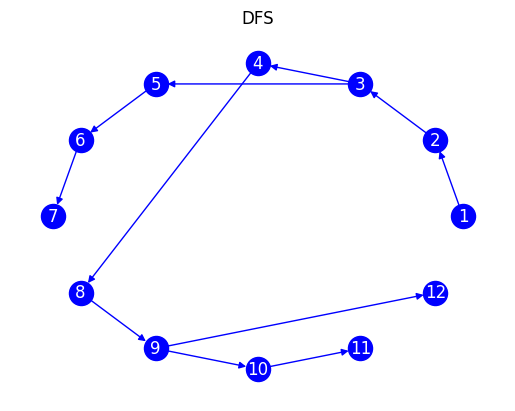

Method: BFS
Tree Nodes:  [1, 2, 3, 4, 5, 8, 6, 7, 9, 11, 10, 12]


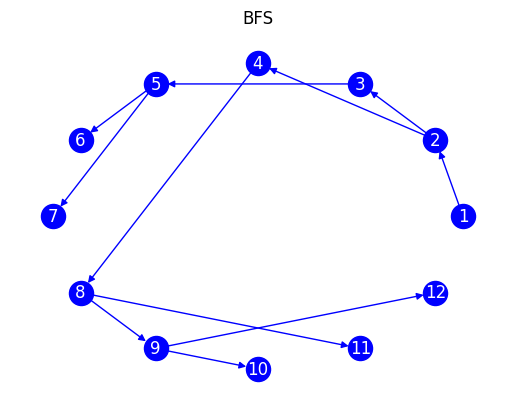

In [21]:
B = nx.Graph()
B.add_nodes_from(range(1,12))
B.add_edges_from([(1,2),(2,3),(3,4),(3,5),(4,2),(4,8),(5,6),(6,7),(7,5),(8,9),(9,10),(10,11),(8,11),(9,12)])
traversal(B,1,'dfs')
traversal(B,1,'bfs')

2. Given Graphs

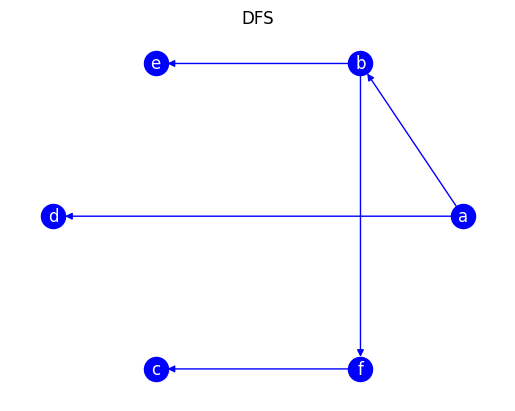

Method: BFS
Tree Nodes:  ['a', 'b', 'd', 'c', 'e', 'f']


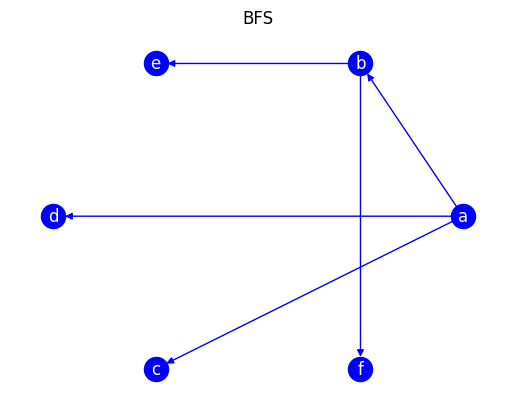

In [22]:
T1 = nx.Graph()
T1.add_edges_from(
[
("a", "b"),
("b", "e"),
("a", "d"),
("a", "c"),
("c", "f"),
("f", "b"),
]
)
traversal(T1, "a", "dfs")
traversal(T1, "a", "bfs")

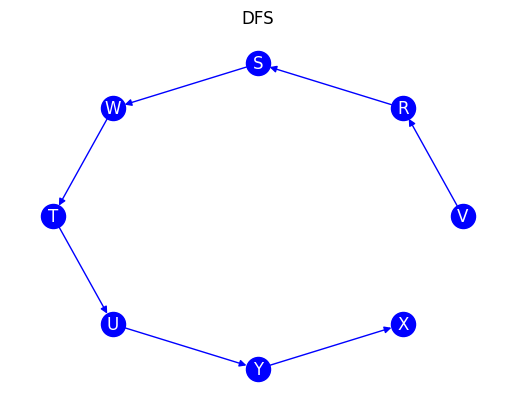

Method: BFS
Tree Nodes:  ['V', 'R', 'S', 'W', 'T', 'X', 'U', 'Y']


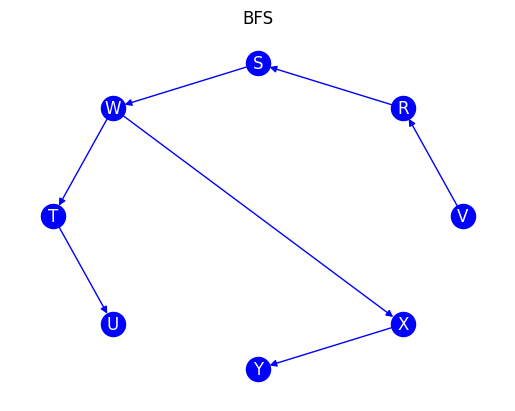

In [23]:
T2 = nx.Graph()
T2.add_edges_from([
('V','R'),
('R','S'),
('S','W'),
('W','T'),
('T','U'),
('U','Y'),
('Y','X'),
('X','W'),
('X','T'),
])
traversal(T2,'V','dfs')
traversal(T2,'V','bfs')